<i>Written by: Ahsan Khan, On behalf of Alberta Machine Intelligence Institute for the Al Pathways Partnership supported by Prairies Economic Development Canada</i>

# Lab: Computer Vision

In [1]:
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

Retrieving image from a link

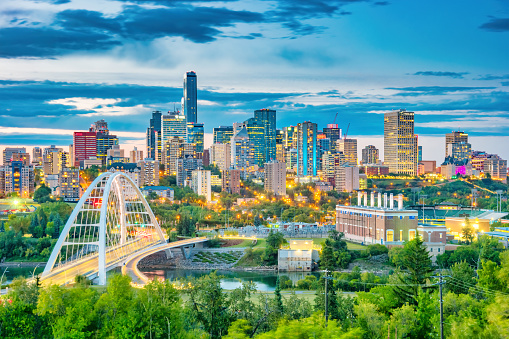

In [2]:
urllib.request.urlretrieve(
  'https://media.istockphoto.com/photos/skyline-of-downtown-edmonton-alberta-canada-at-twilight-picture-id1279220699?b=1&k=20&m=1279220699&s=170667a&w=0&h=9ARNx2BH-clzkU8VSqV5yH9Sr_yTJfs9b9_ZS217SCk=',
   "edmonton.png")
  
img = Image.open("edmonton.png")
#plt.imshow(img)
img

## Activity One: Image Processing

For this first activity you will be performing some image processing

##### [A] Convert the image into a numpy array and display the array

In [3]:
image = np.array(img)
image

array([[[172, 199, 226],
        [173, 201, 225],
        [174, 200, 225],
        ...,
        [ 12, 121, 190],
        [ 15, 120, 188],
        [ 17, 120, 186]],

       [[173, 201, 225],
        [175, 201, 226],
        [176, 202, 227],
        ...,
        [ 13, 122, 191],
        [ 14, 121, 189],
        [ 17, 122, 188]],

       [[176, 202, 227],
        [178, 204, 227],
        [180, 204, 228],
        ...,
        [ 10, 123, 193],
        [ 13, 122, 191],
        [ 14, 121, 189]],

       ...,

       [[ 11,  89,  14],
        [  4,  71,   4],
        [  4,  76,   3],
        ...,
        [141, 150,  69],
        [153, 174,  73],
        [148, 167,  52]],

       [[  3, 104,   2],
        [ 22, 111,  21],
        [  7,  89,   4],
        ...,
        [157, 179,  36],
        [152, 182,  22],
        [155, 177,  30]],

       [[ 12,  67,   9],
        [ 26,  93,  24],
        [ 11,  78,   0],
        ...,
        [148, 171,  29],
        [126, 156,  10],
        [149, 168,  42]]

##### [A] The image has 3 color channels (RGB). Make a copy of the original image and display the new copy image in blue only (red and green channels set to 0)

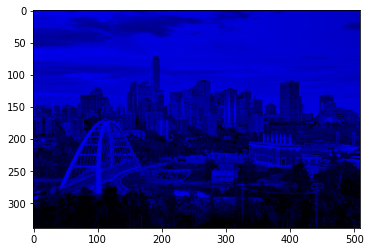

In [4]:
non_rgb_image = image.copy()
non_rgb_image[:, :, 0] = 0
non_rgb_image[:, :, 1] = 0

plt.imshow(non_rgb_image)

##### [A] Slice the image to only show the bridge (some part of the bridge can be cut but the displayed image should mostly contain the bridge).

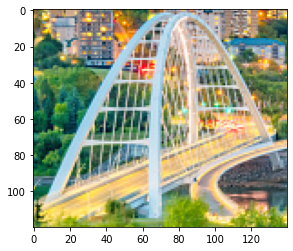

In [5]:
plt.imshow(image[170:290,35:175,:])

##### [A] Sharpen the image using open cv library (Can use any filter of your choice - read the documentation)

In [6]:
import cv2

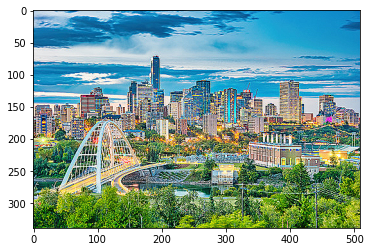

In [7]:
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened_image = cv2.filter2D(image, -1, kernel)
plt.imshow(sharpened_image)

**Interactive HSV Filter**

In [8]:
import cv2
from ipywidgets import *

def f(hMin, hMax, Smin, Smax, Vmin, Vmax):
    raw_img = cv2.imread('edmonton.png')
    img = cv2.cvtColor(raw_img ,cv2.COLOR_BGR2RGB)  
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    Lhsv = np.array([hMin, Smin, Vmin])
    Uhsv = np.array([hMax, Smax, Vmax])
    mask = cv2.inRange(hsv,Lhsv ,Uhsv)
    r = cv2.bitwise_and(img, img, mask=mask)
    plt.imshow(r)
  
    
interactive(f, hMin=(0,255), hMax=(0,255), Smin=(0,255), Smax=(0,255), Vmin=(0,255), Vmax=(0,255))

interactive(children=(IntSlider(value=127, description='hMin', max=255), IntSlider(value=127, description='hMa…

##### [A] Normalize the picture of edmonton 

## Activity Two: Image Classification

In the previous machine learning course (ML 1) during your last lab you were introduced to the mnist dataset. You were required to classify each number using a logistic regression. This time you will be classifying the numbers using a neural network.

In [9]:
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf

(train_X, train_y), (test_X, test_y) = mnist.load_data()

##### [A} Display the very first element (number) in the train_X set

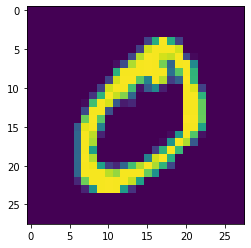

In [10]:
plt.imshow(train_X[1])

##### [A] Verify the y label for the very first element in the train_y set so it matches with the X element above

In [11]:
train_y[1]

0

##### [A] Normalize your images (divide by 255)

In [12]:
train_X = train_X/255
test_X = test_X/255

##### [A] Build a neural network architecture aside from the dense layers, include maxpooling, flattening layers, and dropouts.

In [13]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.1))
model.add(Dense(10,activation=tf.nn.softmax))

2022-06-10 01:16:48.519404: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Visualize your neural network model**

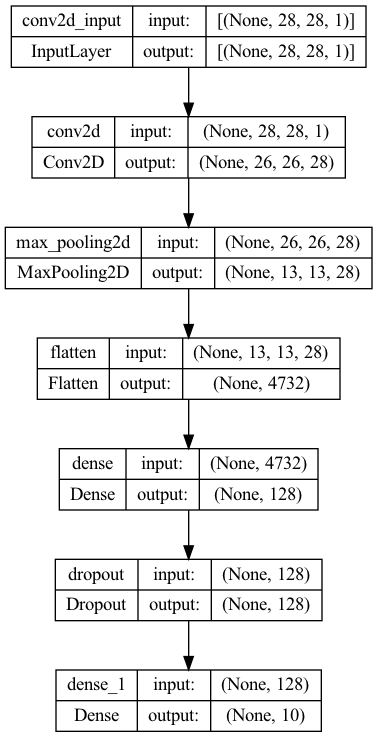

In [14]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

##### [A] Compile and fit your image data on your network

In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=train_X,y=train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1928 - accuracy: 0.9422
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0713 - accuracy: 0.9786
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0474 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0337 - accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0252 - accuracy: 0.9917
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0185 - accuracy: 0.9941
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0148 - accuracy: 0.9951
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0149 - accuracy: 0.9949
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0114 - accuracy: 0.9963
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

#### [A] Evaluate your model and make predictions on a few elements (number images) from the test set.

In [16]:
model.evaluate(test_X, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9848


[0.0703321322798729, 0.9847999811172485]

In [17]:
pred = model.predict(test_X[75].reshape(1, 28, 28, 1))
#pred = model.predict(test_X[50])

1/1 [==============================] - 0s 66ms/step


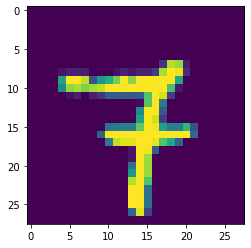

In [18]:
plt.imshow(test_X[75])

In [19]:
print(pred.argmax())

7


### Maybe Activity 3